In [ ]:
!pip install opendatasets


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/omkargurav/face-mask-dataset")

100%|██████████| 163M/163M [00:06<00:00, 28.4MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall

# Image dimensions
img_width, img_height = 150, 150

# Path to the main directory
train_data_dir = '/content/face-mask-dataset/data'

# Image augmentation
datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='training')

validation_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='validation')


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [ ]:
# Model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

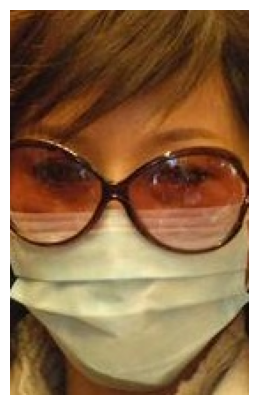

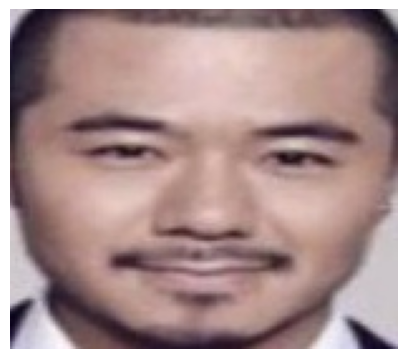

In [ ]:
import matplotlib.pyplot as plt
import os

def display_single_image(image_path):
    if os.path.isfile(image_path):
        img = plt.imread(image_path)
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print(f"{image_path} is not a valid file path.")

display_single_image('/content/face-mask-dataset/data/with_mask/with_mask_10.jpg')
display_single_image('/content/face-mask-dataset/data/without_mask/without_mask_10.jpg')


In [ ]:
# Accessing images and labels from the generators (optional)
x_train, y_train = next(train_generator)
x_test, y_test = next(train_generator)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,epochs=500,batch_size=32,validation_data=(x_test,y_test),verbose=2)

Epoch 1/500
1/1 - 0s - loss: 1.4081e-05 - accuracy: 1.0000 - val_loss: 0.8284 - val_accuracy: 0.7812 - 163ms/epoch - 163ms/step
Epoch 2/500
1/1 - 0s - loss: 1.3999e-05 - accuracy: 1.0000 - val_loss: 0.8285 - val_accuracy: 0.7812 - 86ms/epoch - 86ms/step
Epoch 3/500
1/1 - 0s - loss: 1.3918e-05 - accuracy: 1.0000 - val_loss: 0.8286 - val_accuracy: 0.7812 - 80ms/epoch - 80ms/step
Epoch 4/500
1/1 - 0s - loss: 1.3838e-05 - accuracy: 1.0000 - val_loss: 0.8288 - val_accuracy: 0.7812 - 88ms/epoch - 88ms/step
Epoch 5/500
1/1 - 0s - loss: 1.3760e-05 - accuracy: 1.0000 - val_loss: 0.8289 - val_accuracy: 0.7812 - 120ms/epoch - 120ms/step
Epoch 6/500
1/1 - 0s - loss: 1.3682e-05 - accuracy: 1.0000 - val_loss: 0.8291 - val_accuracy: 0.7812 - 56ms/epoch - 56ms/step
Epoch 7/500
1/1 - 0s - loss: 1.3606e-05 - accuracy: 1.0000 - val_loss: 0.8293 - val_accuracy: 0.7812 - 52ms/epoch - 52ms/step
Epoch 8/500
1/1 - 0s - loss: 1.3531e-05 - accuracy: 1.0000 - val_loss: 0.8295 - val_accuracy: 0.7812 - 65ms/epoch 

In [ ]:
/content/face-mask-dataset/data/without_mask/without_mask_1898.jpg

1/1 [==============================] - 0s 18ms/step
Prediction: Without Mask (Probability: 0.014536603353917599)
